### 相关性热力图

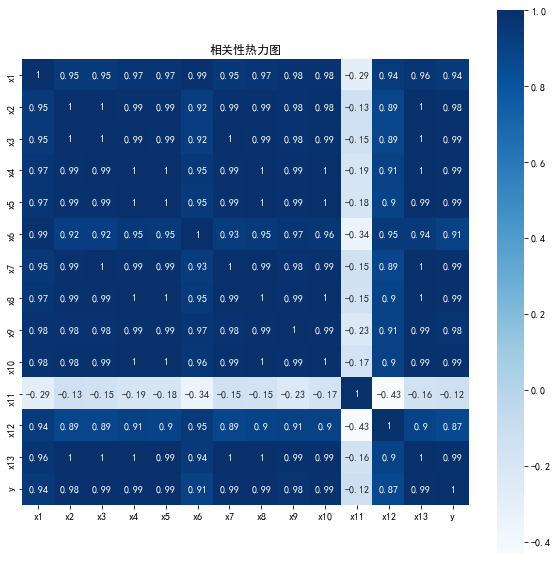

In [86]:
import numpy as np
import pandas as pd

working_dir = "C:/Users/ylc/GitHub/Learning/Python/Hands-onDataAnalysisandDataMiningwithPython/"
data = pd.read_csv(working_dir+"ch6data.csv")
corr = data.corr(method='pearson') # 计算相关系数矩阵

import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(10, 10)) # 设置画面大小
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签(设置为黑体)
plt.rcParams['axes.unicode_minus'] = False  #用来显示正常负号
sns.heatmap(corr, annot=True, vmax=1, square=True, cmap="Blues")
plt.title("相关性热力图")
plt.show()

### Lasson回归选取关键属性

In [108]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso

working_dir = "C:/Users/ylc/GitHub/Learning/Python/Hands-onDataAnalysisandDataMiningwithPython/"
data = pd.read_csv(working_dir+"ch6data.csv")
print("原始数据为：", data.iloc[0:4])

lasso = Lasso(1000) # 调用Lasso()函数，设置lamda的值为1000
lasso.fit(data.iloc[:, 0:13], data['y'])
print("相关系数为：", np.round(lasso.coef_, 5)) # 输出结果，保留五位小数
print("相关系数非零个数为：", np.sum(lasso.coef_ != 0)) # 计算相关系数非零的个数

mask = lasso.coef_ != 0 # 返回一个相关系数是否为零的布尔数组
mask = np.append(mask, True)
print("相关系数是否为零：", mask)

new_reg_data = data.iloc[:, mask] # 返回相关系数非零的数据
print("输出数据为：", new_reg_data.iloc[0:4])

原始数据为：         x1      x2      x3        x4       x5       x6      x7       x8     x9    x10    x11    x12   x13       y
0  3831732  181.54  448.19   7571.00  6212.70  6370241  525.71   985.31  60.62  65.66  120.0  1.029  5321   64.87
1  3913824  214.63  549.97   9038.16  7601.73  6467115  618.25  1259.20  73.46  95.46  113.5  1.051  6529   99.75
2  3928907  239.56  686.44   9905.31  8092.82  6560508  638.94  1468.06  81.16  81.16  108.2  1.064  7008   88.11
3  4282130  261.58  802.59  10444.60  8767.98  6664862  656.58  1678.12  85.72  91.70  102.2  1.092  7694  106.07
相关系数为： [-1.8000e-04 -0.0000e+00  1.2414e-01 -1.0310e-02  6.5400e-02  1.2000e-04
  3.1741e-01  3.4900e-02 -0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
 -4.0300e-02]
相关系数非零个数为： 8
相关系数是否为零： [ True False  True  True  True  True  True  True False False False False
  True  True]
输出数据为：         x1      x3        x4       x5       x6      x7       x8   x13       y
0  3831732  448.19   7571.00  6212.70  6370241  525.71   985.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34165.31873662018, tolerance: 705.262984228
  model = cd_fast.enet_coordinate_descent(


### 支持向量回归预测模型

原始数据：
            x1      x2      x3       x4       x5       x6      x7       x8     x9    x10    x11    x12   x13      y
1994  3831732  181.54  448.19  7571.00  6212.70  6370241  525.71   985.31  60.62  65.66  120.0  1.029  5321  64.87
1995  3913824  214.63  549.97  9038.16  7601.73  6467115  618.25  1259.20  73.46  95.46  113.5  1.051  6529  99.75
1996  3928907  239.56  686.44  9905.31  8092.82  6560508  638.94  1468.06  81.16  81.16  108.2  1.064  7008  88.11 
 ...
预测结果：
          true         pred
2010  1399.16  1375.191802
2011  1535.14  1594.118640
2012  1579.68  1867.681053
2013  2088.14  2223.773586


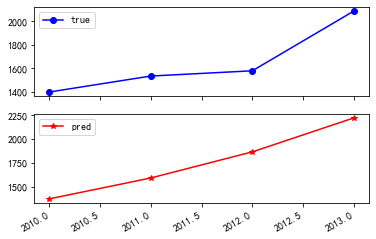

In [146]:
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVR

working_dir = "C:/Users/ylc/GitHub/Learning/Python/Hands-onDataAnalysisandDataMiningwithPython/"
data = pd.read_csv(working_dir+"ch6data.csv")
data.index = list(range(1994, 2014))
print("原始数据：\n", data[0:3], "\n ...")

feature = list(data.columns[0:13]) # 属性所在列
data_train = data.loc[range(1994, 2010)].copy() # 取2010年前的数据建模
data_mean = data_train.mean()
data_std = data_train.std()
data_train = (data_train-data_mean)/data_std # 数据标准化
x_train = data_train[feature].values # 属性数据
y_train = data_train['y'].values # 标签数据

linearsvr = LinearSVR(max_iter=5000) # 调用LinearSVR()函数
linearsvr.fit(x_train, y_train)

data_test = data.loc[range(2010, 2014)].copy() # 去2010-2013年数据作为测试集
data_test = (data_test-data_mean)/data_std
x_test = data_test[feature].values
pred = linearsvr.predict(x_test) * data_std['y'] + data_mean['y'] # 预测，并还原结果
data_result = pd.DataFrame(data={'true':data.loc[range(2010, 2014)]['y'], 'pred':pred}, index=range(2010, 2014))
print("预测结果：\n", data_result)

fig = data_result[['true', 'pred']].plot(subplots = True, style = ['b-o', 'r-*'])
plt.show()